## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_mob_home.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8253 entries, 0 to 8252
Data columns (total 33 columns):
DAMAGE_PROPERTY       8253 non-null float64
DURATION_SECONDS      8253 non-null float64
BEGIN_LAT             8253 non-null float64
BEGIN_LON             8253 non-null float64
TOR_LENGTH            8253 non-null float64
TOR_WIDTH             8253 non-null float64
YEAR                  8253 non-null float64
OPEN_WATER_PROP       8253 non-null float64
DEV_OPEN_PROP         8253 non-null float64
DEV_LOW_PROP          8253 non-null float64
DEV_MED_PROP          8253 non-null float64
DEV_HIGH_PROP         8253 non-null float64
DECID_FOREST_PROP     8253 non-null float64
EVERGR_FOREST_PROP    8253 non-null float64
MIXED_FOREST_PROP     8253 non-null float64
SHRUB_SCRUB_PROP      8253 non-null float64
GRASS_LAND_PROP       8253 non-null float64
PASTURE_HAY_PROP      8253 non-null float64
CULT_CROPS_PROP       8253 non-null float64
WOOD_WETLAND_PROP     8253 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8253 entries, 0 to 8252
Data columns (total 1 columns):
DAMAGE_PROPERTY    8253 non-null float64
dtypes: float64(1)
memory usage: 64.6 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8253 entries, 0 to 8252
Data columns (total 32 columns):
DURATION_SECONDS      8253 non-null float64
BEGIN_LAT             8253 non-null float64
BEGIN_LON             8253 non-null float64
TOR_LENGTH            8253 non-null float64
TOR_WIDTH             8253 non-null float64
YEAR                  8253 non-null float64
OPEN_WATER_PROP       8253 non-null float64
DEV_OPEN_PROP         8253 non-null float64
DEV_LOW_PROP          8253 non-null float64
DEV_MED_PROP          8253 non-null float64
DEV_HIGH_PROP         8253 non-null float64
DECID_FOREST_PROP     8253 non-null float64
EVERGR_FOREST_PROP    8253 non-null float64
MIXED_FOREST_PROP     8253 non-null float64
SHRUB_SCRUB_PROP      8253 non-null float64
GRASS_LAND_PROP       8253 non-null float64
PASTURE_HAY_PROP      8253 non-null float64
CULT_CROPS_PROP       8253 non-null float64
WOOD_WETLAND_PROP     8253 non-null float64
HERB_WETLAND_PROP     8253 non-null float64
BARREN_LAND_P

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.9113
 0.6554
 0.5805
   ⋮    
 0.7569
 1.1335
 0.9807
[torch.DoubleTensor of size 8253x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 4.5872e-01 -7.3512e-01  3.8636e-01  ...   8.7008e-02  2.8949e+00  3.0227e-01
 7.8822e-01 -5.1501e-01  1.4830e+00  ...   1.2048e+00 -1.3523e+00  1.7190e+00
-3.0188e-01  1.3455e+00  7.4718e-01  ...   9.8083e-01 -9.0986e-01  3.0227e-01
                ...                   ⋱                   ...                
 3.5279e-01 -7.0616e-02  9.1784e-01  ...   3.4123e-01  2.5148e-01 -1.8228e+00
 1.3419e+00 -5.8518e-01  3.6380e-01  ...   1.7985e-01 -2.0528e+00  3.0227e-01
 8.3356e-01 -1.9460e+00  1.2740e+00  ...   1.5585e+00  1.7041e+00 -4.0608e-01
[torch.DoubleTensor of size 8253x32]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 4.5872e-01 -7.3512e-01  3.8636e-01  ...   8.7008e-02  2.8949e+00  3.0227e-01
 7.8822e-01 -5.1501e-01  1.4830e+00  ...   1.2048e+00 -1.3523e+00  1.7190e+00
-3.0188e-01  1.3455e+00  7.4718e-01  ...   9.8083e-01 -9.0986e-01  3.0227e-01
                ...                   ⋱                   ...                
 3.5279e-01 -7.0616e-02  9.1784e-01  ...   3.4123e-01  2.5148e-01 -1.8228e+00
 1.3419e+00 -5.8518e-01  3.6380e-01  ...   1.7985e-01 -2.0528e+00  3.0227e-01
 8.3356e-01 -1.9460e+00  1.2740e+00  ...   1.5585e+00  1.7041e+00 -4.0608e-01
[torch.FloatTensor of size 8253x32]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

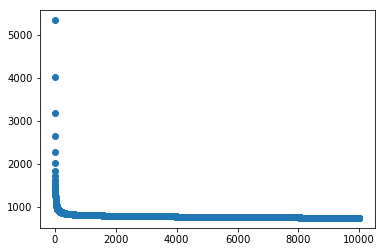

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8253)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

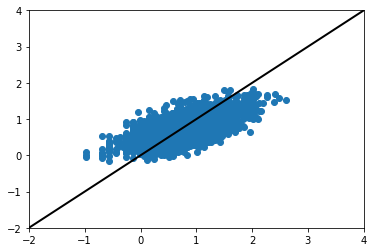

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_mob_home.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 269.6749
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2741)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

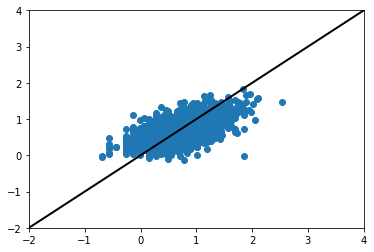

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.2: Test Set Performance

In [23]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros_mob_home.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [24]:
# Validation set predictors
test_predictors = test_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [25]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 272.7062
[torch.FloatTensor of size 1]

In [26]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [27]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2683)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.409956 + 7.691221


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

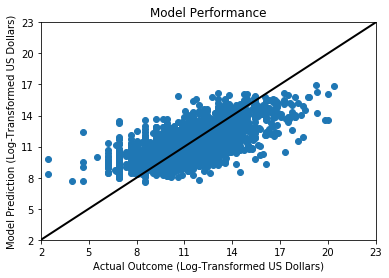

In [28]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [29]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1373  0.0846  0.1768 -0.1593  0.0342 -0.0662  0.0807 -0.0345  0.1145  0.0443
-0.0003  0.0566 -0.1021  0.2180 -0.2376  0.0728  0.0698  0.0813 -0.0025  0.1070
 0.0959 -0.0574  0.0787 -0.0892 -0.0246  0.0205  0.0348 -0.0372  0.1094  0.0261
-0.1189  0.1344 -0.1433  0.0789 -0.0182 -0.0800  0.0418 -0.0864 -0.1125 -0.0538
 0.0990  0.0393  0.0307  0.0176 -0.1421 -0.1756 -0.0036  0.1404 -0.2291  0.0382
-0.0707 -0.1813 -0.0366  0.0330 -0.1734  0.1971  0.0520 -0.0683 -0.0013  0.0463
-0.0035 -0.0244  0.0451  0.0472  0.0941  0.1111 -0.1423  0.0456  0.0898  0.0084
-0.1281  0.0660 -0.1073 -0.0661 -0.1756 -0.0544  0.1240 -0.0521 -0.1693  0.1422
 0.0003 -0.1155  0.0701 -0.2255  0.1519  0.0063  0.0381  0.0370 -0.1419 -0.0111
 0.0344 -0.0172  0.0594 -0.0208  0.0814  0.1075 -0.1414  0.0801 -0.0318  0.1005
 0.0652 -0.1143 -0.1114  0.1259  0.0005 -0.0080 -0.0122  0.0023  0.1442  0.0520
 0.0960 -0.0710  0.1413  0.0257 -0.0527  0.0033  0.0222  0.1031  0.0691  0.0063
-

In [30]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0308 -0.2110 -0.2421 -0.1066 -0.2394  0.1604  0.0632 -0.0746 -0.1374 -0.1350

Columns 10 to 19 
 0.0056 -0.0872  0.1637 -0.1955  0.1309  0.0033  0.1626  0.1142  0.2703  0.1955

Columns 20 to 20 
 0.2689
[torch.FloatTensor of size 1x21]

## Round 2: Two-Hidden-Layer Neural Network

In [31]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [32]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 1))

In [33]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 6e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

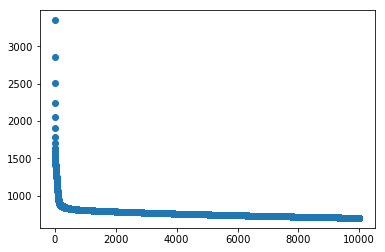

In [34]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [35]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

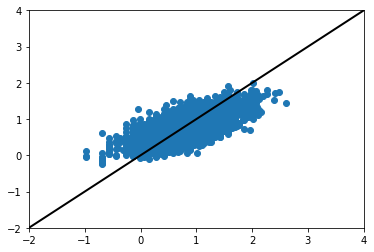

In [36]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [37]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 268.5342
[torch.FloatTensor of size 1]

In [38]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

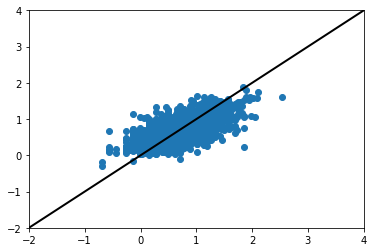

In [39]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.2: Test Set Performance

In [40]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 280.0412
[torch.FloatTensor of size 1]

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

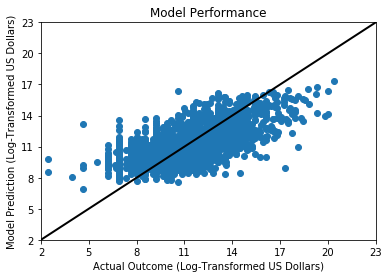

In [42]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [43]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1246  0.1237 -0.1276  0.1824 -0.3105  0.0245  0.2178 -0.1192  0.1210 -0.1065
 0.0524 -0.0357 -0.0074  0.0921 -0.1488 -0.0123  0.0971  0.0503 -0.0334 -0.0016
 0.0048  0.1752  0.2570  0.1947  0.2612 -0.2116  0.0099  0.1280 -0.0539 -0.1415
 0.0304  0.1061  0.1738 -0.1076  0.0556 -0.1792  0.0548 -0.0730  0.1200 -0.2108
-0.1714  0.1097 -0.0286 -0.0132  0.1542  0.0353 -0.0810  0.0284  0.0027  0.0909
 0.3320 -0.0607 -0.0962  0.0518  0.0349  0.0271 -0.1049  0.0661  0.0718  0.0747
 0.0999  0.0188  0.1140  0.2458 -0.1557 -0.1916 -0.0192 -0.0521 -0.0722 -0.0804
 0.0246 -0.0050 -0.2387 -0.0999  0.0982  0.0767 -0.0372 -0.0179 -0.0029 -0.0486
-0.0876  0.2364  0.2292  0.0508  0.1012 -0.1939  0.0566 -0.2726  0.0989  0.1289
 0.1246 -0.1798 -0.0561  0.1980  0.1808  0.0694  0.1148  0.1642  0.0312  0.2224
 0.0311  0.1099 -0.0523  0.1074 -0.0358 -0.1719 -0.0866  0.0461  0.0292  0.0675
-0.0989 -0.0043  0.2319 -0.1169 -0.0118  0.0067 -0.0428  0.1033  0.0275  0.0017
-

In [44]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1203 -0.1951  0.1583 -0.1558 -0.0430 -0.0640  0.0437 -0.1360 -0.0395 -0.0732
-0.0387  0.1164  0.1614  0.2185 -0.0462 -0.1638 -0.0442  0.1207  0.0054  0.2929
-0.3807  0.0523  0.0156  0.0910 -0.0328  0.2293 -0.0379 -0.1551  0.0609  0.0175
-0.1249  0.0916 -0.1750 -0.0702 -0.1113 -0.1726  0.0802  0.1454  0.1243 -0.0787
-0.0410 -0.1224 -0.0887 -0.0640  0.0456 -0.3531  0.0079  0.0250  0.0772  0.1830
 0.0691  0.1957  0.1424 -0.0618  0.2746 -0.0814 -0.0323  0.0930 -0.2563  0.1669
 0.0797 -0.3069  0.1237 -0.0205 -0.1619 -0.0565 -0.1099 -0.1909  0.2155  0.1892
-0.0815 -0.1074  0.1647  0.0311 -0.1961 -0.1772 -0.1251  0.0920  0.0817 -0.0044
-0.1273 -0.0920  0.2189 -0.0902  0.1527 -0.1797  0.0755  0.2500 -0.0897 -0.1926
-0.1020  0.1807  0.2648  0.0766  0.0968  0.0521 -0.2712  0.1451 -0.2194  0.1450
-0.1281 -0.0855  0.2543  0.1204 -0.0179  0.0929 -0.1806 -0.1162 -0.0705  0.0631
 0.0067 -0.1648 -0.1717 -0.1346 -0.1206 -0.1284  0.1061 -0.2027 -0.0197 -0.1976
 

In [45]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1359  0.2150  0.4575  0.0591 -0.2736 -0.5167  0.4998 -0.3196 -0.2639  0.3152

Columns 10 to 13 
 0.4292  0.0165  0.4663  0.5136
[torch.FloatTensor of size 1x14]

## Round 3: Three-Hidden-Layers Neural Network

In [46]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [47]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 1))

In [48]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

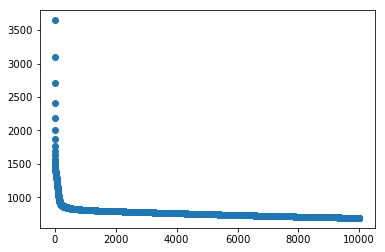

In [49]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [50]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

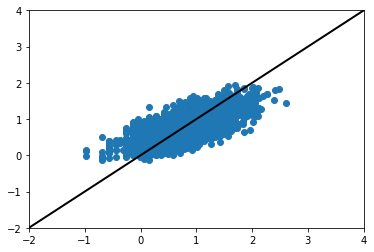

In [51]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [52]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 282.0818
[torch.FloatTensor of size 1]

In [53]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

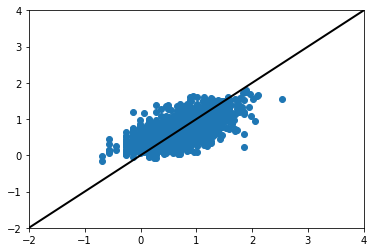

In [54]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.2: Test Set Performance

In [55]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 280.9003
[torch.FloatTensor of size 1]

In [56]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

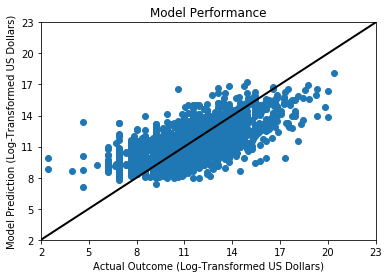

In [57]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [58]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1247 -0.1013  0.2064  0.1346 -0.0900 -0.1913 -0.1061 -0.0090 -0.0741  0.1327
 0.2249  0.0494  0.0117  0.1644  0.0893 -0.1494 -0.0260 -0.0387  0.0314 -0.0184
 0.0391 -0.2268  0.1651  0.0263  0.0386  0.0618  0.1535 -0.0208 -0.0665 -0.1959
 0.0916 -0.0158  0.0578 -0.2183 -0.1439  0.1626  0.0758 -0.0029 -0.0876 -0.0238
 0.2243  0.0154 -0.1219 -0.0228  0.0302 -0.1536  0.1265  0.1265 -0.0039  0.0821
 0.1090  0.0431  0.1289  0.1498  0.0127 -0.1714 -0.0953 -0.0108 -0.2396  0.1186
-0.0195 -0.1625 -0.1497  0.0372  0.0978 -0.0018 -0.0931  0.0379 -0.0505  0.0860
 0.0702  0.0916  0.1693  0.0855  0.2132 -0.1369 -0.1393  0.0466  0.1137  0.0685
-0.1157  0.1441 -0.2033  0.0464  0.0109 -0.0855 -0.0359  0.0506 -0.0978 -0.0897
-0.0967 -0.2122  0.0276  0.3287 -0.3037 -0.1712  0.0766 -0.0024 -0.0213 -0.0010
-0.1055  0.0046  0.0045 -0.1703 -0.1386 -0.2322  0.2056  0.0288 -0.0218  0.0994
 0.2972 -0.1954  0.0193  0.1240  0.0670  0.0631  0.0324 -0.0522  0.0445  0.0681
-

In [59]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1286 -0.1416 -0.0452  0.1425  0.1019 -0.1023 -0.1018 -0.2212  0.1279  0.1343
-0.1336  0.0637  0.0822 -0.1883 -0.1039  0.1274 -0.0312  0.0071 -0.2805  0.0779
-0.1014  0.0108  0.2119 -0.0251  0.0513 -0.1660 -0.0008  0.1321 -0.0885  0.1382
-0.1549  0.2417  0.0923  0.1764  0.0028  0.2528  0.1186 -0.1186 -0.2290 -0.1909
 0.0081  0.0640  0.1195  0.1498 -0.0461  0.0832 -0.0892  0.0907 -0.0286  0.0942
-0.1175 -0.1348 -0.0761  0.1060 -0.1903  0.0061 -0.2168  0.1068  0.1165 -0.1183
 0.0233 -0.0880  0.2048  0.2182  0.1651 -0.1518 -0.1701 -0.0988  0.0113  0.0489
-0.3082 -0.0078 -0.0277 -0.0064 -0.0825  0.0447 -0.0749  0.2631  0.0025 -0.2168
 0.1913  0.1158  0.2714 -0.0406 -0.1427 -0.1868  0.1022  0.1578 -0.0566  0.1162
-0.0318  0.2385  0.0230  0.1592  0.2269  0.2838 -0.1361 -0.0042 -0.1985  0.2008
 0.0823 -0.1679 -0.0374  0.0159  0.0527 -0.0159 -0.0101  0.1062  0.2104  0.0370
 0.1196  0.1815  0.2710 -0.0221 -0.0449  0.1288  0.0185  0.1536 -0.0862  0.2980
-

In [60]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1871  0.0822  0.3095  0.1405 -0.0364 -0.1250 -0.0862 -0.0418  0.1298  0.2988
-0.1218 -0.0582 -0.0336 -0.2672  0.0128  0.1013 -0.1544 -0.0313 -0.1560  0.0626
 0.1824 -0.3526 -0.3203 -0.2853  0.2569 -0.1096 -0.0514 -0.3399  0.0686  0.3587
-0.2584  0.0565 -0.0876 -0.2502  0.0343  0.1768 -0.0468  0.0579 -0.1081 -0.0590
 0.2147 -0.0911  0.1407 -0.3030  0.2078  0.3057  0.1368 -0.2958 -0.0072  0.2072
-0.2660 -0.0148 -0.0704  0.3187  0.1756 -0.1338 -0.1867  0.1356  0.2323 -0.1597
-0.1682  0.0507  0.0626 -0.1792 -0.0405 -0.2117 -0.0334  0.2852 -0.3493  0.2840
-0.2055  0.3358  0.1440  0.0410 -0.1083  0.0642  0.1195  0.2463 -0.0455  0.1789
 0.1345 -0.2276 -0.0768 -0.2450 -0.1180 -0.0194  0.0510 -0.3385  0.2713  0.4106

Columns 10 to 13 
 0.0116  0.3774 -0.2105  0.0303
 0.2046 -0.2241  0.0434  0.2074
 0.3139 -0.1283 -0.1213  0.1089
-0.0910 -0.1419 -0.0348  0.1592
 0.2231  0.0261  0.0855 -0.1453
-0.2464 -0.0141  0.1964  0.3557
 0.1034  0.2042 -0.1341 -0.154

In [61]:
model[(6)].weight

Parameter containing:
 0.3691 -0.0675 -0.6542 -0.3023 -0.4561  0.3791  0.3694  0.5975 -0.6228
[torch.FloatTensor of size 1x9]

## Round 4: Four-Hidden-Layer Neural Network

In [62]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [63]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 1))

In [64]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

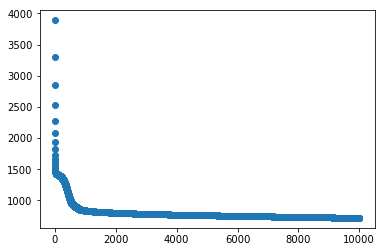

In [65]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

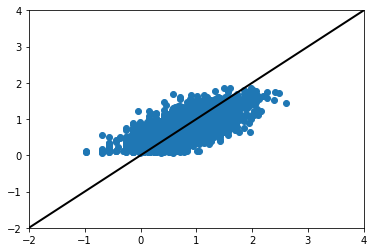

In [67]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [68]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 271.5038
[torch.FloatTensor of size 1]

In [69]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

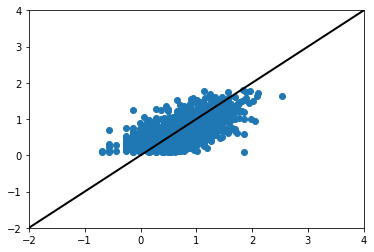

In [70]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.2: Test Set Performance

In [71]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 273.6892
[torch.FloatTensor of size 1]

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

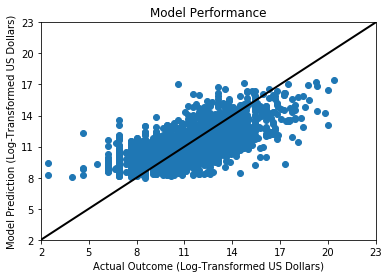

In [73]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [74]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1790 -0.0956  0.0350  0.1296  0.0038  0.0292  0.0338  0.0876 -0.0711  0.1960
 0.1572  0.1680  0.0627  0.1778  0.0417 -0.0593  0.1042 -0.0251  0.0436 -0.1732
 0.1978  0.1606 -0.0768  0.1405  0.2389 -0.0517 -0.0912  0.0918 -0.0910  0.0968
 0.0019  0.1073  0.0560  0.0427  0.1618  0.0295 -0.1067 -0.0492 -0.1905  0.0023
 0.1433 -0.1929  0.0908 -0.0953  0.0277  0.0478 -0.0513  0.1022 -0.0335 -0.1208
 0.0465 -0.2683 -0.0001 -0.0695  0.1208  0.0046 -0.0410  0.0247  0.1619 -0.1181
 0.1185 -0.0143  0.0147 -0.0177 -0.2256  0.0107  0.1265  0.0893 -0.0318 -0.1099
-0.1486 -0.2214  0.1087  0.1676 -0.0217 -0.1828  0.1597 -0.1382  0.0486  0.0875
-0.1593 -0.0654  0.1175  0.0269  0.1278  0.1955  0.1007  0.0930  0.1223  0.1974
 0.1191  0.0675 -0.0163  0.0253  0.2199 -0.0255  0.1064 -0.0871  0.0270  0.0645
-0.0441 -0.0776  0.0061  0.0284  0.0209  0.0440  0.1265 -0.1573  0.0060 -0.0508
-0.1121 -0.0467 -0.1208 -0.0215  0.1310  0.0406 -0.1157 -0.0751  0.1712  0.2195
-

In [75]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.2487 -0.0663  0.1523 -0.0769  0.0255 -0.1534  0.1686  0.0058  0.0741 -0.1028
 0.0423  0.1074  0.1705  0.0512  0.0731  0.1349  0.0245  0.0998 -0.0378  0.1657
-0.0503  0.2448  0.2208  0.0693 -0.0548 -0.0768 -0.1374  0.1221 -0.1613  0.2114
-0.1071 -0.0839  0.0238  0.1528 -0.0727 -0.2063 -0.0735  0.1153  0.0452  0.0394
 0.0168  0.0336  0.0772  0.0154 -0.1634  0.0506 -0.0000 -0.1442 -0.2038  0.0084
 0.1801  0.1083  0.0951  0.2312  0.0928  0.1239 -0.1977  0.0682 -0.0630  0.0963
 0.1944 -0.0036 -0.0639  0.1055  0.0874 -0.1729 -0.1994 -0.1697  0.1715  0.1659
-0.1169  0.0662 -0.0498  0.1870 -0.1421  0.0863  0.2244 -0.0899  0.0891  0.1216
 0.0977  0.1717 -0.2059 -0.0548 -0.0922  0.1530  0.2427  0.1780 -0.1628 -0.0244
-0.1983 -0.1596 -0.0099  0.0184  0.1318  0.0776  0.1044 -0.0649 -0.0258  0.0149
 0.0613  0.1496  0.2004  0.0655 -0.0861 -0.0833 -0.1774  0.1730  0.0326  0.1646
-0.1662 -0.0580  0.0722  0.1733  0.1749 -0.1346 -0.1934  0.2447  0.1150 -0.1405
-

In [76]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2463 -0.0064  0.0659  0.2140  0.2322  0.1846 -0.1949 -0.1771  0.1915 -0.0728
-0.1639 -0.1447  0.0994  0.1273 -0.0809  0.0013 -0.0473  0.1663  0.0631  0.0667
-0.1783 -0.1134  0.0403 -0.1388  0.0259 -0.0498  0.0306  0.2456  0.0429  0.1753
 0.0205 -0.2464  0.2128  0.1314 -0.2527 -0.1524  0.1274 -0.1763  0.2012  0.0926
-0.3064  0.2029 -0.1070 -0.0996  0.2908  0.2644  0.1740 -0.1911 -0.3305 -0.2674
-0.1533 -0.2033 -0.0770  0.0445  0.1509 -0.0570  0.0632  0.0776  0.0640  0.0143
-0.3485  0.1603  0.1102  0.0607 -0.1124  0.3179  0.2041 -0.1997 -0.0239  0.2442
-0.2035  0.1347 -0.0928 -0.2984  0.1614  0.0114 -0.0010 -0.2749  0.0413 -0.1388
 0.0569  0.2477  0.2890  0.1987  0.1806  0.3527 -0.1182  0.1502  0.2031  0.0219

Columns 10 to 13 
-0.0447  0.0896  0.1368 -0.1090
-0.0235  0.0992 -0.2747 -0.2906
-0.1380 -0.0146 -0.2394 -0.1354
-0.1143 -0.1521 -0.2199  0.2026
-0.0248  0.1303  0.0224  0.2197
 0.1586 -0.0478 -0.1642  0.2438
 0.3727  0.1017  0.2739  0.250

In [77]:
model[(6)].weight

Parameter containing:
-0.1071  0.0334  0.2234  0.0595 -0.3380  0.2349 -0.3431 -0.2166  0.1049
 0.2653  0.2631 -0.0669 -0.1601 -0.2479 -0.1736 -0.1832 -0.2848 -0.0178
 0.1783 -0.2055  0.2503  0.0509 -0.1290 -0.2792 -0.2345 -0.0078  0.2242
 0.0879  0.2343 -0.2315 -0.1688  0.1832  0.2374 -0.1886 -0.2438  0.2412
-0.2305  0.0463  0.2792 -0.2971  0.2835  0.1796  0.3757 -0.1773  0.4579
-0.2176  0.2116 -0.3065  0.0738 -0.0271 -0.0175 -0.2833 -0.4404 -0.0288
[torch.FloatTensor of size 6x9]

In [78]:
model[(8)].weight

Parameter containing:
-0.8364 -0.6997  0.2316  0.2717  0.7321 -0.6854
[torch.FloatTensor of size 1x6]

## Round 5: Five-Hidden-Layer Neural Network

In [79]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [80]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 1))

In [81]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

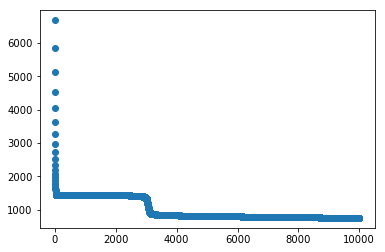

In [82]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

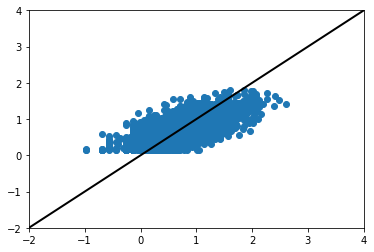

In [84]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [85]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 268.3582
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

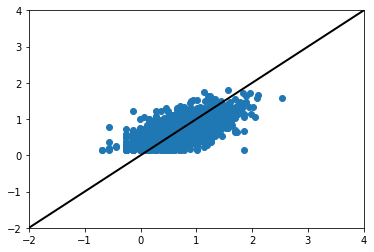

In [87]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.2: Test Set Performance

In [88]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 272.2003
[torch.FloatTensor of size 1]

In [89]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

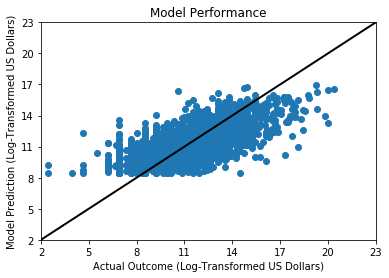

In [90]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [91]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0354 -0.0142  0.1326  0.0548  0.1036 -0.0153 -0.0082  0.1806 -0.1361  0.0802
-0.0530  0.1417  0.2946  0.1034  0.1819 -0.1114  0.0511 -0.0070 -0.0648 -0.2036
-0.0324 -0.1628  0.0778 -0.0223 -0.1444 -0.0959 -0.0924  0.1765  0.0501  0.0939
 0.1076 -0.0025 -0.0573 -0.1680 -0.1867  0.0881 -0.1102  0.0244 -0.0084 -0.0955
 0.0438 -0.0490  0.0982 -0.1225  0.1417 -0.0134 -0.1313 -0.0540  0.1497 -0.1531
-0.0911 -0.0665  0.1725 -0.0645 -0.1327 -0.0090 -0.1479  0.0404 -0.1163  0.0304
-0.0968 -0.1936 -0.0345 -0.0561 -0.0769 -0.1524 -0.1241  0.1555 -0.0495 -0.1237
 0.0291 -0.0139 -0.0146  0.0756  0.1567  0.0464  0.0769  0.0116 -0.0780 -0.1030
-0.1311  0.1220 -0.1780  0.1329  0.0266  0.0217  0.1300 -0.0687  0.0048 -0.0687
-0.0033 -0.1552 -0.0404  0.1224  0.1200 -0.0687 -0.2427  0.0241  0.0486 -0.0401
 0.0013 -0.0962 -0.0124  0.0985 -0.1422  0.1311  0.1465 -0.1211  0.1209 -0.0903
-0.0852 -0.1592 -0.0083 -0.0668 -0.1224  0.1095  0.0615 -0.1154  0.0096  0.0810
 

In [92]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2251 -0.1877  0.0853  0.0822 -0.0434  0.0614 -0.1908  0.2101 -0.0808  0.0227
-0.1685  0.3046 -0.0752  0.0452 -0.1208  0.1716  0.0823  0.2169 -0.0683  0.1905
-0.0939 -0.0727 -0.0279  0.2089 -0.2197  0.0551  0.2198 -0.2126  0.2081 -0.1652
-0.1396 -0.0402  0.0898 -0.1558  0.1662  0.1778  0.1918  0.0128 -0.1012 -0.0293
-0.0721 -0.1021  0.0283  0.1693 -0.0261  0.2315  0.2127 -0.0050  0.0839  0.1287
 0.0317 -0.2664  0.1254  0.1829  0.0547 -0.0051  0.1151  0.0685  0.1559 -0.1742
 0.0342  0.0288 -0.1717  0.1208  0.0676 -0.1186 -0.2034 -0.1809  0.2352  0.0464
 0.1964 -0.0112 -0.0295  0.1796 -0.1198 -0.1453 -0.0203 -0.0685  0.0537  0.0749
-0.1588  0.0653  0.1323  0.1009  0.0579  0.1317 -0.0045 -0.1782 -0.0947 -0.0472
-0.1305  0.2572  0.1656  0.1816 -0.1224  0.0668  0.0131  0.1645 -0.1556  0.1016
-0.1060  0.1072 -0.0400 -0.0618 -0.1408 -0.0404  0.1698  0.0971  0.1020 -0.2026
 0.2132  0.0888 -0.0275 -0.0125  0.2001 -0.0181  0.0131 -0.0177  0.0728  0.1429
 

In [93]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1798  0.3810  0.0265  0.1324 -0.1803 -0.1987 -0.0999 -0.0517 -0.1412  0.0371
-0.2412 -0.0921  0.1803 -0.1215  0.2263  0.0722 -0.0496 -0.1803  0.2050  0.0622
-0.0924  0.2824  0.0185  0.2452 -0.1754 -0.0241 -0.2081  0.1278 -0.0233  0.1868
 0.0958  0.3511 -0.2519 -0.1106 -0.2196 -0.2057  0.0355 -0.2162 -0.2158  0.3283
-0.0811  0.2822 -0.2813 -0.0814  0.1305 -0.0485 -0.1893  0.1138  0.1628 -0.1175
 0.2166  0.1625 -0.1761  0.0882  0.1526 -0.1536  0.1121  0.0590 -0.1068 -0.1564
 0.1262  0.1612  0.2331 -0.0176  0.2570 -0.2299  0.0580  0.2401  0.0325  0.1862
 0.0741 -0.2255 -0.0115  0.1483 -0.1309 -0.1740 -0.0912  0.0341 -0.2192  0.2214
-0.1253  0.1428  0.0709 -0.2142 -0.1159 -0.0062  0.0465 -0.2450 -0.2117 -0.0656

Columns 10 to 13 
 0.2247  0.2015 -0.1629 -0.2296
 0.1704 -0.0889  0.0232  0.2082
 0.1808 -0.0862 -0.0053 -0.3146
-0.1851  0.2169 -0.0984  0.0584
 0.3156  0.0716 -0.1481  0.1229
 0.0517 -0.0040  0.1732  0.0463
 0.2447 -0.2033 -0.1335  0.132

In [94]:
model[(6)].weight

Parameter containing:
 0.3007 -0.3399  0.4186  0.5300  0.0560 -0.2458 -0.1707 -0.1960 -0.0000
-0.0211 -0.2529  0.1843 -0.0960  0.0433 -0.3316 -0.2741  0.0253  0.0074
-0.3259  0.2316 -0.1117  0.1744 -0.1987 -0.3179  0.0943 -0.0964  0.2973
 0.3879 -0.0755  0.2382  0.1532  0.3775 -0.3182  0.2152  0.1074  0.1270
 0.1620 -0.1016 -0.1660 -0.0022  0.0593  0.2733 -0.2178 -0.0848 -0.2347
-0.1373 -0.2078 -0.2296 -0.3170 -0.0681 -0.2739 -0.0768  0.1186 -0.1254
[torch.FloatTensor of size 6x9]

In [95]:
model[(8)].weight

Parameter containing:
 0.3123  0.1453 -0.2013  0.1026  0.1784 -0.1846
 0.5773 -0.0217 -0.3574  0.3416 -0.2996  0.0289
 0.5000  0.1455 -0.2941  0.4721 -0.0105  0.1563
-0.0551 -0.1489  0.2082  0.1865 -0.0500  0.2342
[torch.FloatTensor of size 4x6]

In [96]:
model[(10)].weight

Parameter containing:
-0.0648  0.6477  0.6279 -0.3371
[torch.FloatTensor of size 1x4]

## Round 6: Six-Hidden-Layer Neural Network

In [97]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [98]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [99]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

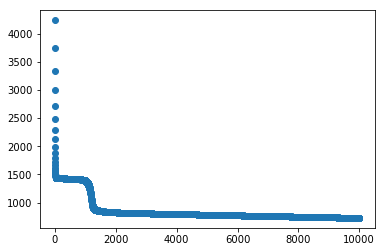

In [100]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [101]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

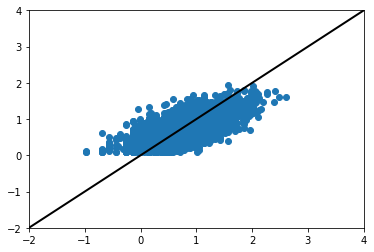

In [102]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [103]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 273.9197
[torch.FloatTensor of size 1]

In [104]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

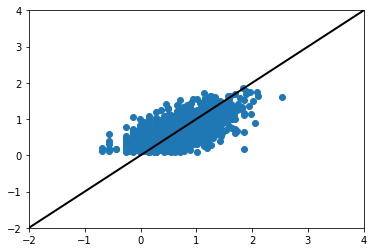

In [105]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.2: Test Set Performance

In [106]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 276.3979
[torch.FloatTensor of size 1]

In [107]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

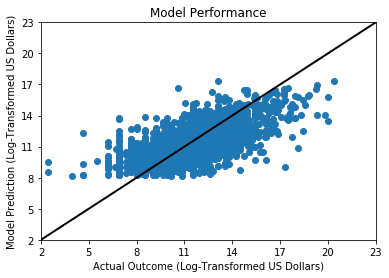

In [108]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [109]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1141  0.0645  0.0512 -0.0113 -0.0233 -0.0057 -0.1103 -0.0077  0.1067 -0.0488
-0.0695 -0.0584 -0.0894  0.0904  0.1736 -0.1955  0.1551  0.0337 -0.1376  0.1037
-0.0767  0.0574 -0.1222 -0.0302  0.0509  0.0616 -0.1384  0.1244  0.0970 -0.0133
 0.0951  0.0543  0.2284 -0.0991  0.1927 -0.2005 -0.0729 -0.0129  0.0397  0.0215
-0.0138 -0.0644  0.0727  0.0246 -0.2046 -0.2027  0.0397 -0.0707  0.1297 -0.0021
-0.0141 -0.0303  0.1587  0.0182 -0.0668  0.1049  0.1859 -0.0112 -0.0819 -0.0084
 0.0700 -0.2632  0.0935 -0.0683  0.1288 -0.0007  0.2139  0.1784 -0.0405 -0.0010
 0.1740  0.0163 -0.0625  0.0940 -0.1379 -0.1824 -0.1251 -0.1035 -0.0938  0.1247
-0.0237 -0.0643  0.0798 -0.0362 -0.0774  0.1881 -0.1262 -0.0013  0.0955 -0.1496
-0.0433  0.0733 -0.0532 -0.0615  0.0470  0.2376  0.0851  0.1305 -0.0390 -0.1198
 0.1244 -0.0095 -0.0273 -0.1872  0.1128 -0.1558 -0.0615  0.0673  0.0313 -0.0424
-0.0682 -0.0599  0.1655  0.1807  0.1258 -0.1211 -0.0040 -0.0435 -0.1633  0.0379
 

In [110]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1808 -0.1960  0.0425  0.1660  0.0375 -0.0903  0.2463  0.0752 -0.2076 -0.0459
-0.0712 -0.0505  0.2302 -0.0116 -0.0245 -0.1282  0.0734  0.0214 -0.1143 -0.1425
-0.1707 -0.0353  0.0845 -0.1360  0.0167 -0.1592 -0.1601 -0.1507 -0.1270 -0.1801
-0.1563  0.1306  0.1239 -0.2017  0.1496 -0.0901  0.0571 -0.0498 -0.2315  0.1506
-0.0293  0.1153 -0.1681  0.1585 -0.0004  0.0586 -0.0913 -0.1150 -0.0680 -0.1455
 0.2484 -0.0060 -0.1904  0.1222  0.2379  0.1057  0.2616 -0.2701 -0.0857 -0.1132
-0.1209  0.1149  0.1790  0.0589 -0.1583  0.0782  0.0162  0.1333  0.0831 -0.0774
 0.2331 -0.0835  0.2449  0.0695 -0.0506 -0.1432  0.0881 -0.0540  0.0978 -0.1303
-0.2053 -0.1800  0.1795  0.0253  0.0992 -0.1043  0.0816 -0.1934  0.1453  0.1376
-0.1103  0.0802  0.1181  0.0832 -0.0412 -0.0921 -0.1863  0.0749 -0.2581 -0.1252
-0.0910 -0.2233  0.0804  0.1275  0.1111 -0.0116 -0.1381 -0.1066 -0.0254  0.1285
 0.0583  0.2397  0.0016  0.1951  0.0657  0.0788  0.1647 -0.0997  0.0513 -0.0396
-

In [111]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2360  0.2200 -0.1541 -0.1258  0.3059  0.1394  0.0058  0.1647  0.2611  0.0126
 0.0745  0.2690  0.0395  0.1672  0.1471  0.2222  0.2123 -0.0937  0.0083  0.2010
-0.0268 -0.2483  0.0541  0.1823 -0.1892  0.0971  0.1041 -0.0983 -0.1453 -0.1115
-0.0711  0.1727  0.1101 -0.1563  0.0530 -0.1259  0.0747  0.1706 -0.2204 -0.1358
 0.3859  0.2103  0.0709 -0.1517 -0.0506  0.3011  0.2578  0.4296 -0.2525  0.2496
 0.1452  0.0778  0.1992  0.0537  0.1271 -0.2337 -0.1121 -0.1837 -0.0832 -0.2442
-0.1282  0.0178  0.1300 -0.1694  0.3034  0.2880 -0.2065  0.2419  0.1444  0.1547
 0.0727 -0.1501 -0.1725 -0.2390 -0.0938  0.2600 -0.0253  0.1378  0.0474  0.2344
-0.0671  0.2308  0.1449  0.0640  0.1987 -0.2368  0.1536  0.2346  0.1691 -0.1715

Columns 10 to 13 
 0.1710  0.1802 -0.2346 -0.0319
 0.1378 -0.0307  0.0266  0.1956
 0.1221 -0.2578 -0.0657  0.2573
-0.0072 -0.0667 -0.1733  0.0178
 0.0496 -0.3503 -0.1353 -0.0904
 0.0829 -0.0563 -0.2647 -0.2111
 0.2929 -0.1836 -0.2457  0.227

In [112]:
model[(6)].weight

Parameter containing:
 0.2686  0.1174  0.2530  0.2267  0.2991 -0.0985  0.1692  0.4053 -0.1220
 0.3512  0.0500 -0.2163  0.0832  0.4433 -0.0181  0.2185  0.0257 -0.0702
 0.3088 -0.1549  0.1301 -0.1171  0.3179  0.2932  0.3470  0.1487 -0.1291
-0.2595  0.0952  0.1061 -0.0898 -0.1905 -0.2035 -0.0040  0.2798 -0.0744
 0.1569  0.0673  0.2289  0.1895 -0.1452  0.0693 -0.3309  0.1713 -0.2455
 0.1543  0.0174 -0.3301  0.0686 -0.1229 -0.2848 -0.2452 -0.2719 -0.0397
[torch.FloatTensor of size 6x9]

In [113]:
model[(8)].weight

Parameter containing:
 0.4453  0.7254  0.4135 -0.1206 -0.0207  0.2137
 0.1437 -0.2717 -0.0730  0.3273 -0.3530 -0.3357
 0.1975 -0.1613  0.2821 -0.3876 -0.3693  0.1159
 0.2782 -0.3647 -0.2520  0.1174 -0.2498  0.2557
[torch.FloatTensor of size 4x6]

In [114]:
model[(10)].weight

Parameter containing:
 0.4968  0.0211 -0.0720 -0.3675
 0.4307 -0.5029 -0.1290  0.3669
 0.7538 -0.0062  0.4100 -0.3277
[torch.FloatTensor of size 3x4]

In [115]:
model[(12)].weight

Parameter containing:
 0.3744  0.4174  0.6977
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [116]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [117]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [118]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

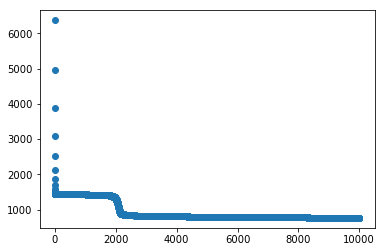

In [119]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [120]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

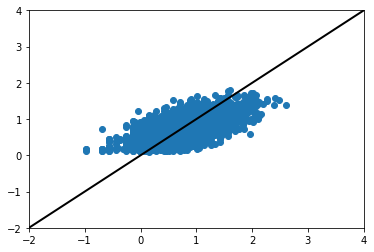

In [121]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [122]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 271.3536
[torch.FloatTensor of size 1]

In [123]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

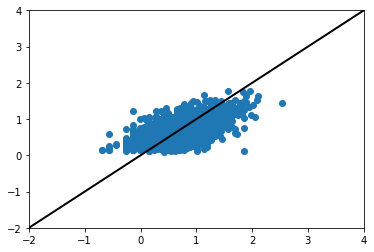

In [124]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.2: Test Set Performance

In [125]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 269.6107
[torch.FloatTensor of size 1]

In [126]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

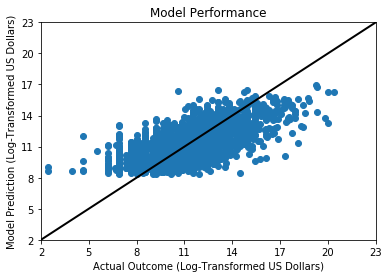

In [127]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [128]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0078 -0.0989 -0.0808  0.0631 -0.0003  0.0780 -0.1042  0.1369 -0.0375 -0.1787
-0.0227 -0.0666  0.0183  0.0408  0.0221 -0.1119  0.0471  0.1106  0.0770  0.1072
 0.0092  0.2850  0.0979 -0.0065  0.0975 -0.0018 -0.0048 -0.0105  0.1422 -0.0805
-0.0235 -0.1560  0.2104  0.0946  0.1551 -0.1768 -0.0249 -0.0948  0.1734 -0.0090
-0.1242 -0.0503 -0.1329  0.0564  0.1671  0.0812 -0.0177  0.0699 -0.0608 -0.1004
-0.0547  0.1335  0.0261  0.1516 -0.0929  0.0483 -0.0527 -0.0110  0.0045 -0.0884
 0.0484  0.2360  0.0214  0.0591  0.1097 -0.2140  0.1042 -0.0404 -0.0784 -0.1788
 0.1284 -0.0388 -0.1534 -0.0469  0.0330 -0.0893 -0.0754  0.0555 -0.1274 -0.0619
-0.0597 -0.0711 -0.0094  0.0044 -0.0627 -0.1411 -0.1182  0.0034 -0.1364  0.1867
 0.2331 -0.0190 -0.2686  0.1129  0.0885  0.1584 -0.0775  0.0493  0.0141 -0.0151
-0.0158  0.1086 -0.0837 -0.0794  0.0495 -0.1621 -0.0204 -0.1490  0.0828  0.1804
-0.0016 -0.0930 -0.0232  0.0409  0.2926 -0.1055  0.0608  0.0237 -0.0681  0.0409
 

In [129]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0936 -0.0298 -0.1602 -0.1806  0.1435 -0.1769  0.0053  0.0961 -0.1275 -0.1380
 0.2020  0.0490  0.1998  0.1581 -0.0355  0.2100 -0.0806  0.0585  0.1641  0.1752
-0.1675 -0.0716  0.1339  0.1330  0.0116 -0.1535  0.0701  0.1609  0.1904 -0.1533
 0.0606 -0.0273 -0.0332  0.0783 -0.2466 -0.0184  0.1472  0.1136 -0.1352  0.0956
 0.2475  0.1986  0.3363  0.2800  0.0158  0.0106  0.2359 -0.1747  0.0422  0.2770
 0.0912 -0.0504 -0.0297 -0.0558  0.0918 -0.0142  0.2115 -0.1626  0.1991  0.0950
-0.1075  0.1960  0.0597  0.1159  0.1457 -0.1279  0.0587 -0.1281 -0.0218 -0.0230
 0.1040  0.1462  0.1158  0.1294 -0.0163 -0.0593  0.1532  0.1028 -0.0656 -0.1270
-0.1883  0.0042  0.1915 -0.1598 -0.0175  0.1731 -0.1783 -0.1808  0.0435  0.1263
 0.0785 -0.0465  0.1068  0.2061  0.1322  0.1990  0.0412 -0.0141 -0.1626  0.1695
 0.0360 -0.2303 -0.1770  0.1563  0.1679 -0.0900  0.0572  0.0326  0.2000 -0.1244
 0.0063  0.0820  0.2406  0.1393 -0.1710  0.1113 -0.0019  0.1473 -0.0232 -0.1034
 

In [130]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1405  0.0611  0.1050  0.1015  0.2598 -0.2450 -0.1371  0.1061 -0.1038  0.2760
 0.2525  0.2443 -0.2008 -0.2057  0.1697  0.1425  0.0846  0.1439 -0.0553  0.0794
 0.0299  0.2794  0.2056 -0.1714  0.2943  0.0579 -0.1495 -0.1762 -0.1351  0.1748
-0.2470  0.1602 -0.0295 -0.1177  0.1628 -0.1127 -0.1855 -0.0847 -0.0647 -0.0165
 0.0992 -0.1860  0.2520 -0.2627 -0.1913  0.0192 -0.2638  0.1903  0.1284  0.1215
 0.0872 -0.2462 -0.1309 -0.0087 -0.0691 -0.2109 -0.1079 -0.1371 -0.2364  0.2677
-0.2485 -0.0511  0.0171  0.2902  0.4531  0.1117  0.1976  0.0188 -0.1744 -0.1420
-0.1290 -0.2090  0.2394 -0.1300 -0.1659 -0.0091 -0.0367 -0.1270 -0.0134 -0.1270
 0.1994 -0.0084  0.0169 -0.0992  0.2099 -0.0787 -0.2309 -0.1384 -0.1245 -0.1512

Columns 10 to 13 
 0.1356  0.1420  0.0979 -0.3183
-0.0053 -0.1145 -0.2723 -0.1801
-0.0766 -0.1613 -0.1403 -0.0672
-0.0834  0.2663 -0.0540 -0.1281
-0.0832 -0.1146 -0.2565  0.1978
-0.0420  0.1338  0.1724  0.2234
-0.2546  0.2779  0.4073 -0.139

In [131]:
model[(6)].weight

Parameter containing:
 0.3885 -0.0619  0.1171  0.4005 -0.2562  0.0903  0.3141 -0.3627  0.1058
 0.2556 -0.1500  0.2991 -0.0040  0.1404 -0.2236  0.4862 -0.0326  0.1689
-0.1012 -0.3035  0.2886  0.2521 -0.0438 -0.0317 -0.0111 -0.2364 -0.0243
 0.1177  0.1002  0.2985  0.0077 -0.0209 -0.2606  0.1596 -0.1318  0.0899
-0.0345 -0.2624  0.0476 -0.1262  0.0216  0.1612 -0.1697 -0.2729  0.2845
-0.1161  0.3251  0.1599 -0.2429  0.1481  0.0730  0.2534  0.0114  0.1920
[torch.FloatTensor of size 6x9]

In [132]:
model[(8)].weight

Parameter containing:
-0.3098  0.1269 -0.0068 -0.2454  0.0023 -0.3030
 0.1410 -0.0111 -0.0311 -0.1153  0.1900  0.1670
 0.0427 -0.2277  0.1412  0.0372  0.2862  0.2670
 0.6733  0.6180 -0.1444  0.2374 -0.1014  0.2931
[torch.FloatTensor of size 4x6]

In [133]:
model[(10)].weight

Parameter containing:
-0.4996 -0.1182  0.0968 -0.0262
 0.1567 -0.4537 -0.2659  0.7805
-0.1345  0.4100 -0.2254 -0.1592
[torch.FloatTensor of size 3x4]

In [134]:
model[(12)].weight

Parameter containing:
 0.2445 -0.3769 -0.4995
-0.0299  0.8507  0.2125
[torch.FloatTensor of size 2x3]

In [135]:
model[(14)].weight

Parameter containing:
 0.5413  0.9918
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [136]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [137]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(32, 1))

In [138]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

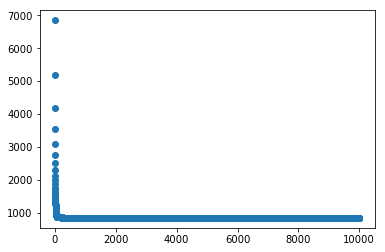

In [139]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [140]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8253)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

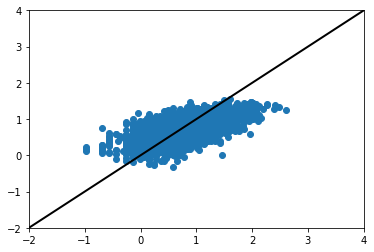

In [141]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [142]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 280.3195
[torch.FloatTensor of size 1]

In [143]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2741)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

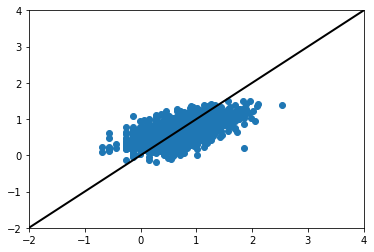

In [144]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.2: Test Set Performance

In [145]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 281.4788
[torch.FloatTensor of size 1]

In [146]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2683)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

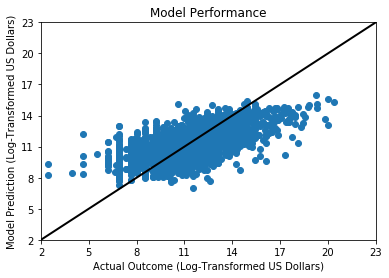

In [147]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [148]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0103  0.0144  0.0160  0.1558  0.1881 -0.0298 -0.0054 -0.0233  0.0338 -0.0273

Columns 10 to 19 
 0.0291 -0.0045  0.0162 -0.0198  0.0005  0.0061 -0.0035  0.0136 -0.0006  0.0112

Columns 20 to 29 
-0.0000  0.0188  0.0248  0.0820  0.0104 -0.0125 -0.0646 -0.0082  0.0117  0.0343

Columns 30 to 31 
 0.0084 -0.0094
[torch.FloatTensor of size 1x32]